# Linear Regression Model: Beijing Housing Prices Analysis & Prediction

Using a linear regression model for descriptive analysis of various variables to establish a housing price prediction model.

### Steps:

#### 1. Dependent Variable Analysis: Price per unit area.


#### 2. Independent Variable Analysis:
- Distribution analysis of independent variables
- Impact analysis of independent variables on the dependent variable

####  3. Establishing the Housing Price Prediction Model:
- Linear regression model
- Log-linear model for the dependent variable
- Log-linear model considering interaction terms

#### 4. Prediction:
 Suppose there is a family of three, and the parents wish for their child to attend school in Dongcheng District, planning to purchase a 70-square-meter two-bedroom apartment near the subway at a mid-level floor; how much would it approximately cost?

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from numpy import correlate, array
from statsmodels.formula.api import ols

# ignore the version warning
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
# Load the data
input_file_path = './source_data/Beijing_Housing_Price_Prediction.csv'
raw_data = pd.read_csv(input_file_path, encoding='utf-8', index_col=None)
raw_data.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268


### Description

- Dist: Location District

- Roomnum: Number of Bedrooms

- Halls: Number of Halls

- Area: House Area

- Floor: Floor Level

- Subway: Proximity to Subway

- School: School District Property Status

- Price: Price per Square Meter

In [30]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16210 entries, 0 to 16209
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dist     16210 non-null  object 
 1   roomnum  16210 non-null  int64  
 2   halls    16210 non-null  int64  
 3   AREA     16210 non-null  float64
 4   floor    16210 non-null  object 
 5   subway   16210 non-null  int64  
 6   school   16210 non-null  int64  
 7   price    16210 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1013.3+ KB


In [32]:
raw_data.shape[0]  # Total Sample Size

(16210, 8)

## Data Preparation

In [33]:
# Data Preparation
house_df=raw_data.copy()
house_df

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268
...,...,...,...,...,...,...,...,...
16205,chaoyang,3,1,76.33,middle,1,0,52405
16206,chaoyang,3,1,76.42,middle,1,0,52343
16207,chaoyang,2,1,61.79,high,1,0,50170
16208,chaoyang,1,1,42.89,high,1,0,52693


In [34]:
#  Data Description
house_df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dist,16210,6,fengtai,2947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roomnum,16210.0,NaN,NaN,NaN,2.166194,0.809907,1.0,2.0,2.0,3.0,5.0
halls,16210.0,NaN,NaN,NaN,1.221407,0.532048,0.0,1.0,1.0,2.0,3.0
AREA,16210.0,NaN,NaN,NaN,91.746598,44.000768,30.06,60.0,78.83,110.5175,299.0
floor,16210,3,middle,5580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subway,16210.0,NaN,NaN,NaN,0.827822,0.377546,0.0,1.0,1.0,1.0,1.0
school,16210.0,NaN,NaN,NaN,0.303085,0.459606,0.0,0.0,0.0,1.0,1.0
price,16210.0,NaN,NaN,NaN,61151.810919,22293.358147,18348.0,42812.25,57473.0,76099.75,149871.0


In [35]:
# Price unit converted to K.
house_df['price'] = house_df['price'].astype(float)/1000

In [36]:
# Rename the column
house_df.rename(columns={
    'roomnum': 'bedroom',
    'halls': 'livingroom',
    'AREA': 'area',
    'floor': 'floor',
    'subway': 'subway',
    'school': 'school',
    'price': 'price'
}, inplace=True)

house_df

,dist,bedroom,livingroom,area,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48.850
1,chaoyang,1,1,59.09,middle,1,0,46.540
2,haidian,5,2,278.95,high,1,1,71.662
3,haidian,3,2,207.00,high,1,1,57.972
4,fengtai,2,1,53.32,low,1,1,71.268
...,...,...,...,...,...,...,...,...
16205,chaoyang,3,1,76.33,middle,1,0,52.405
16206,chaoyang,3,1,76.42,middle,1,0,52.343
16207,chaoyang,2,1,61.79,high,1,0,50.170
16208,chaoyang,1,1,42.89,high,1,0,52.693


## Descriptive statistics

### Dependent Variable Analyisis

Note： The dependent variable refers to a variable whose changes or values are caused by one or more independent variables, typically the variable we attempt to predict or explain in a regression model, also known as the "explained variable" or "response variable." In this case, the dependent variable refers to housing prices.

<Figure size 1200x800 with 0 Axes>

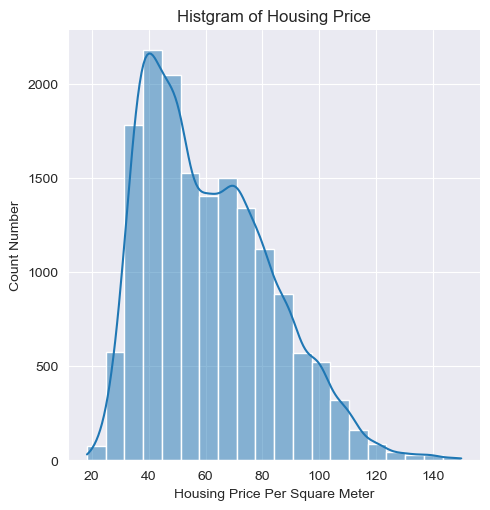

In [37]:
# Histgram of housing price
plt.figure(figsize=(12, 8))
sns.displot(house_df, x='price', bins= 20, kde=True)
plt.xlabel('Housing Price Per Square Meter')
plt.ylabel('Count Number')
plt.title('Histgram of Housing Price')
plt.savefig('./output_figure/Histgram of Housing Price.png')
plt.show()

In [38]:
# Calculate the mean, median, and STD
agg_num = (
    house_df['price']
    .agg(['mean', 'median', 'std'])
)

print(agg_num)

mean      61.151811
median    57.473000
std       22.293358
Name: price, dtype: float64


In [39]:
# Calculate the quantile
quartiles = (
    house_df['price']
    .quantile([0.25, 0.5, 0.75])          
)

print(quartiles)

0.25    42.81225
0.50    57.47300
0.75    76.09975
Name: price, dtype: float64


In [54]:
# Observe the highest and lowest price

# Find the rows corresponding to the minimum and maximum prices
min_price_df = house_df[house_df['price'] == house_df['price'].min()]
max_price_df = house_df[house_df['price'] == house_df['price'].max()]

# Concatenate the rows with minimum and maximum prices
result_df = pd.concat([min_price_df, max_price_df])

result_df

,dist,bedroom,livingroom,area,floor,subway,school,price
2738,fengtai,2,2,100.83,high,0,0,18.348
12788,xicheng,3,1,77.40,low,1,0,149.871


### Independent Variable Analysis

Note： In statistics and regression analysis, "independent variable" refers to a variable used to explain or predict another variable (called the dependent variable). Independent variables are typically considered independent and can influence changes in the dependent variable. Mathematically, independent variables are usually represented as X, while dependent variables are represented as Y.

In [55]:
# For numerical independent variable， calculate the 'min', 'mean', 'median', 'max', and 'std' 

# Define the numerical columns
num_cols = ['area']

# Initialize an empty DataFrame to store the results
summary_df = pd.DataFrame()

# Loop through each column and calculate the summary statistics
for col in num_cols:
    num_cols_agg = house_df[col].agg(['min', 'mean', 'median', 'max', 'std'])
    summary_df[col] = num_cols_agg

# Transpose the DataFrame to get a cross table format
summary_df = summary_df.T

# Display the summary cross table
print(summary_df)

        min       mean  median    max        std
area  30.06  91.746598   78.83  299.0  44.000768


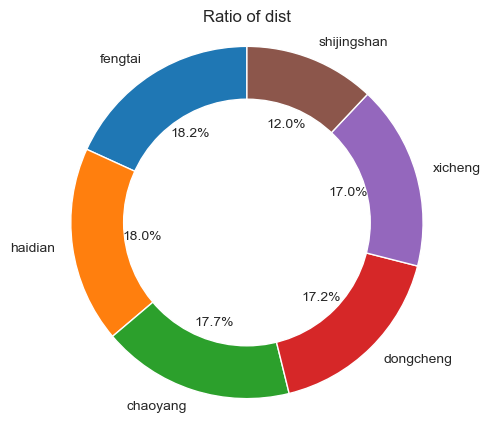

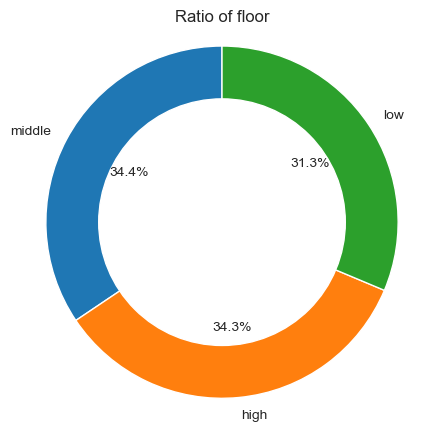

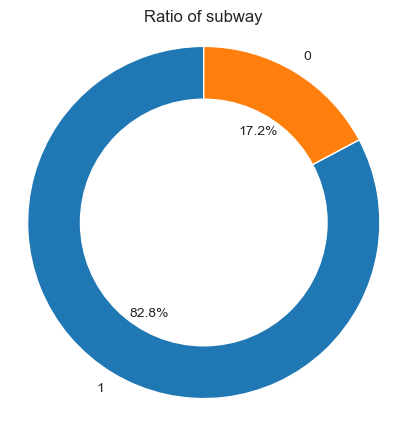

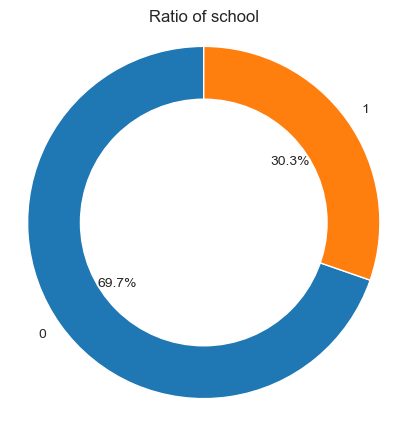

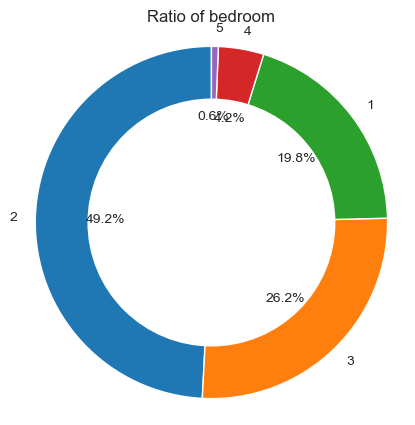

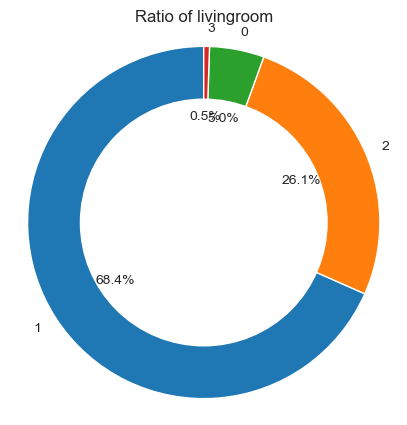

In [56]:
# For Non-numerical independent variables, count the frequency and draw a donut chart.

# Define a function to create a donut chart
def pie(data):
    plt.figure(figsize=(5, 5))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

    # Draw a circle at the center to make it a donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(centre_circle)

    plt.title(f'Ratio of {data.name}')
    plt.axis('equal')  # Ensure the pie is drawn as a circle
    plt.savefig(f'./output_figure/{data.name}_Pie_chart.png')
    plt.show()

# List of non-numerical columns
non_numberical_cols = ['dist', 'floor', 'subway', 'school', 'bedroom', 'livingroom']

# Loop through each non-numerical column and generate a donut chart
for col in non_numberical_cols:
    data = house_df[col].value_counts()
    data.name = col  # Set the name for the index
    pie(data)

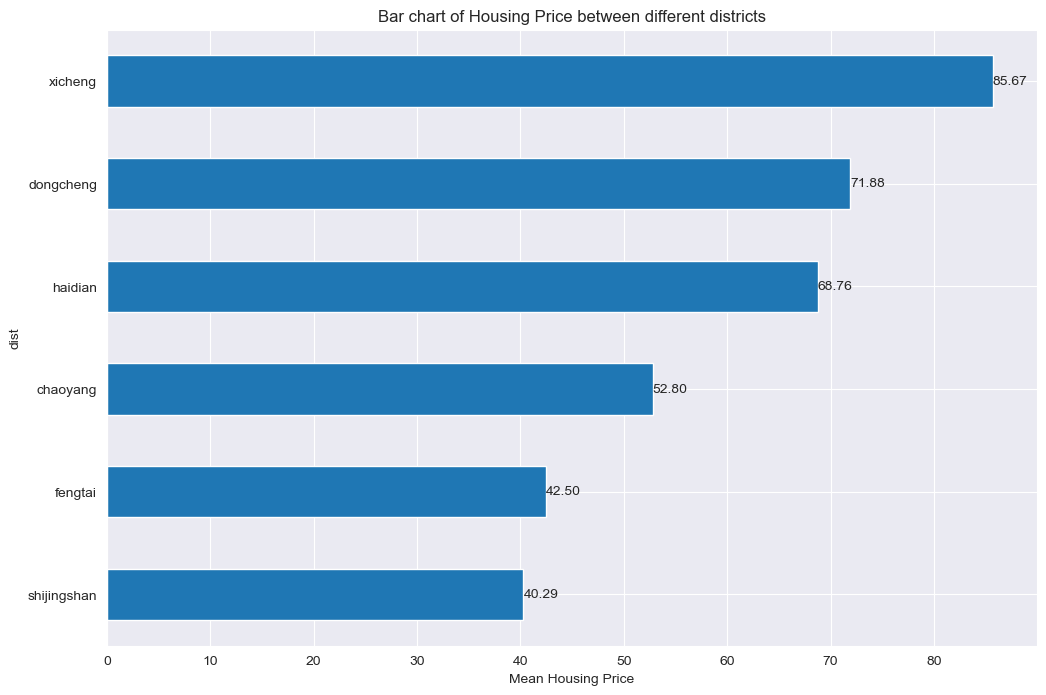

In [57]:
# Calculate the mean price bwtween different district,then build a bar chart

mean_prices = (
    house_df['price']
    .groupby(house_df['dist'])
    .mean()
    .sort_values(ascending=True)
)


plt.figure(figsize=(12, 8))
fig = mean_prices.plot(kind='barh')
# Add price labels to the bars
for index, value in enumerate(mean_prices):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Bar chart of Housing Price between different districts')
plt.xlabel('Mean Housing Price')
plt.savefig('./output_figure/Bar_chart_of_Housing_Price_between_different_districts.png')
plt.show()

### Observe the relationship between each independent variable and the dependent variable.

### Categorical Variable

In [62]:
# Define a function to create side-by-side violin and box plots
def relation_plot(xdata):
    plt.figure(figsize=(16, 8))  # Adjusted size to fit both plots

    # Create a grid for subplots
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    sns.violinplot(x=xdata, y='price', data=house_df)
    plt.title(f'Violin Plot of Housing Prices by {xdata}')
    plt.xlabel(xdata)
    plt.ylabel('Housing Price')

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    sns.boxplot(x=xdata, y='price', data=house_df, showfliers=False)
    plt.title(f'Box Plot of Housing Prices by {xdata}')
    plt.xlabel(xdata)
    plt.ylabel('Housing Price')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'./output_figure/Violin_and_Box_Plot_by_{xdata}.png')
    plt.show()

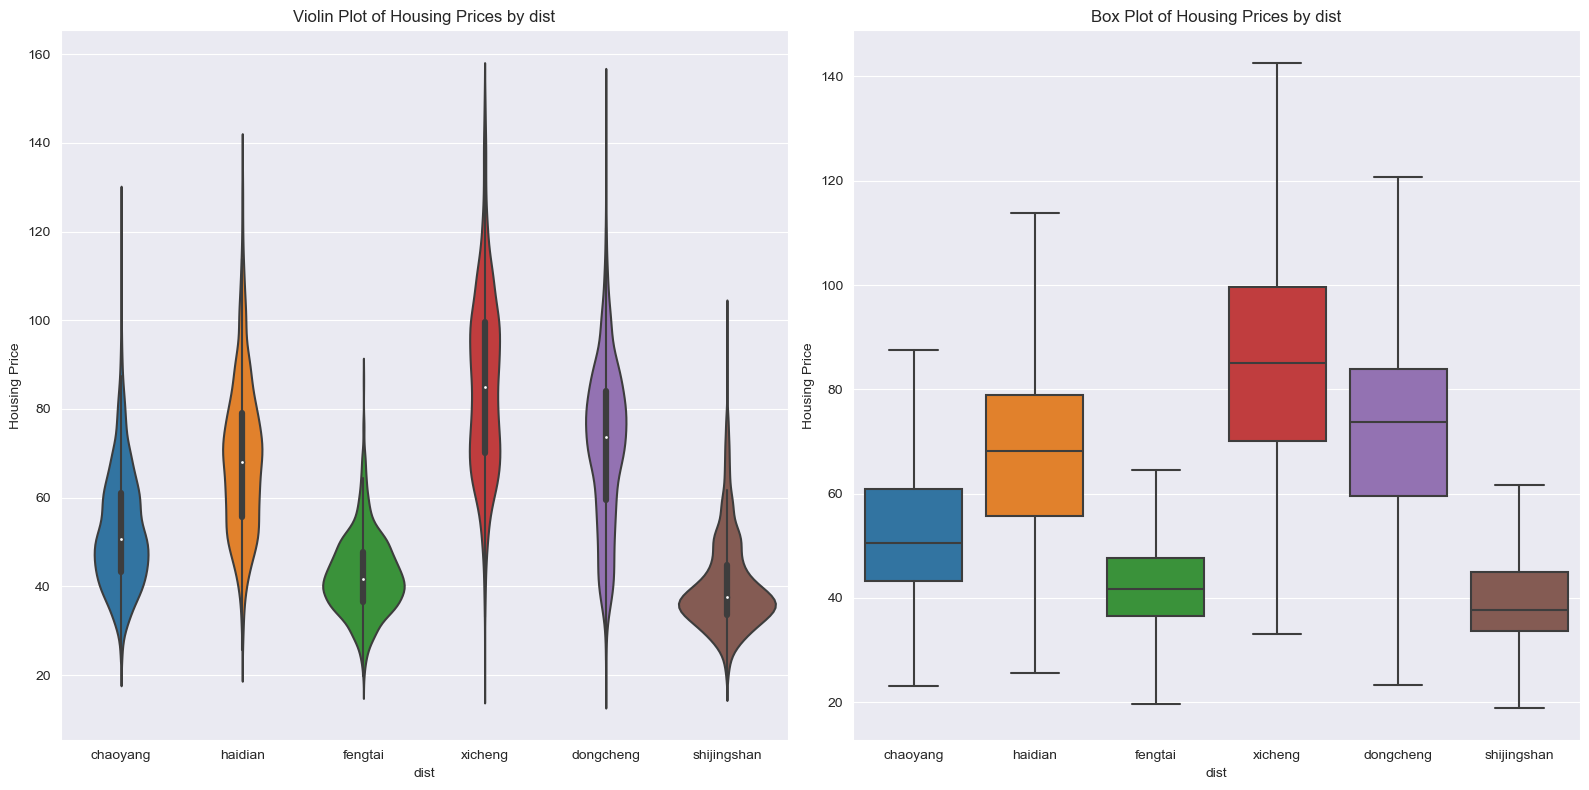

In [63]:
# First，Observe the relationship between  districts and price

col = 'dist'

relation_plot(col)

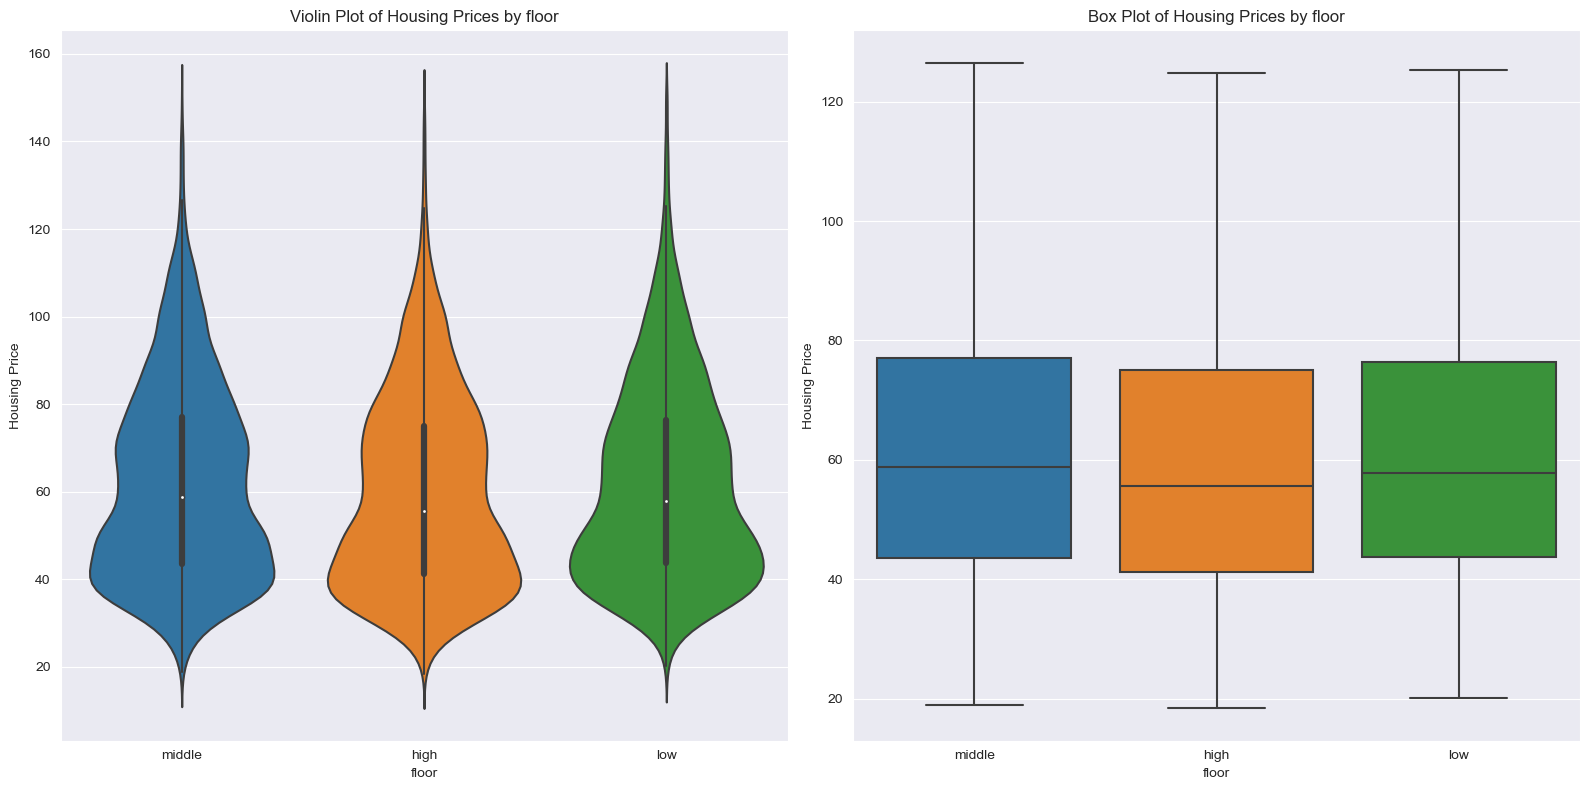

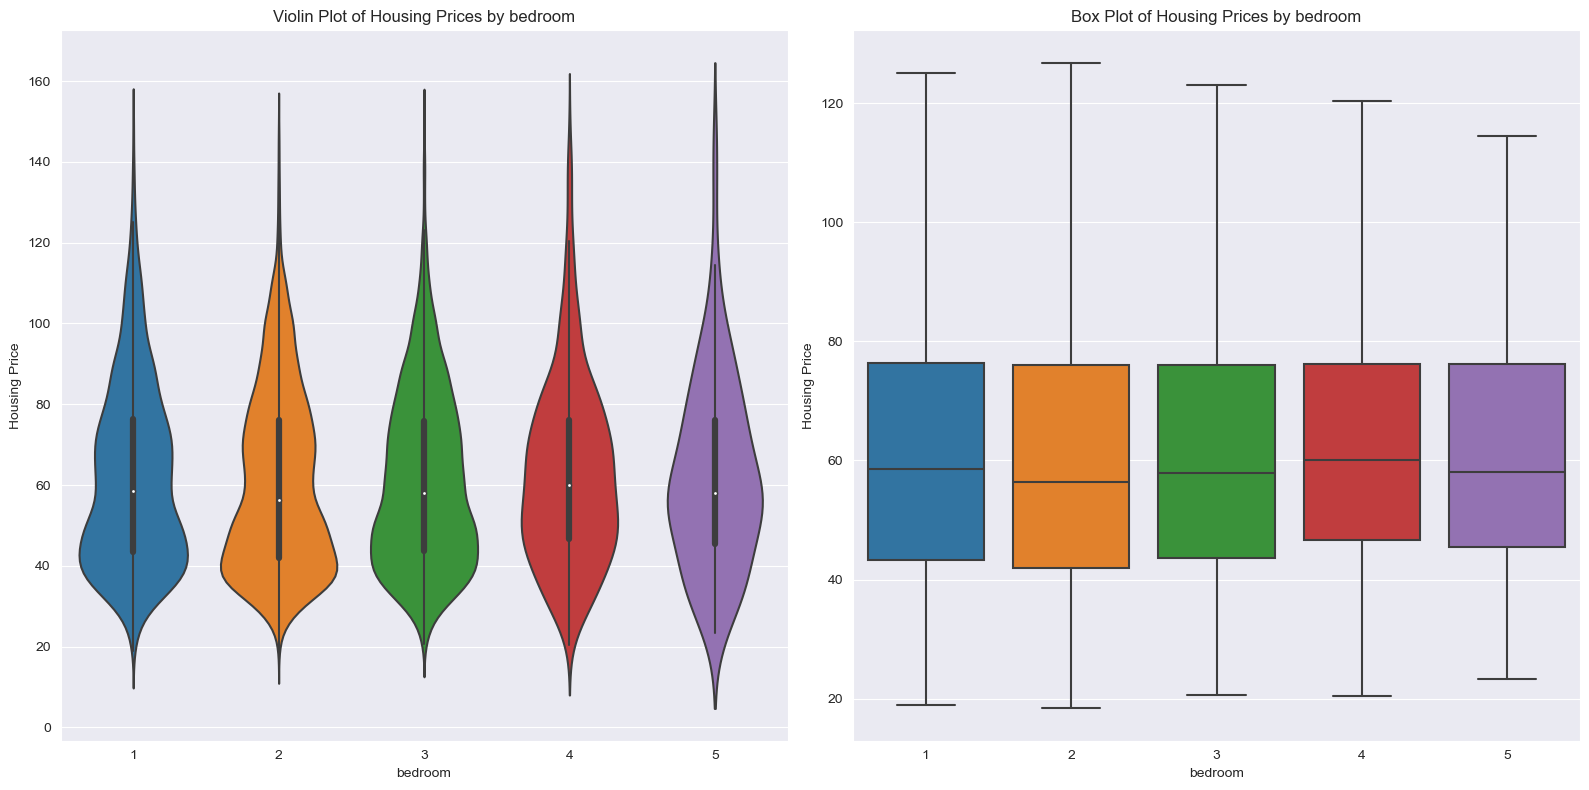

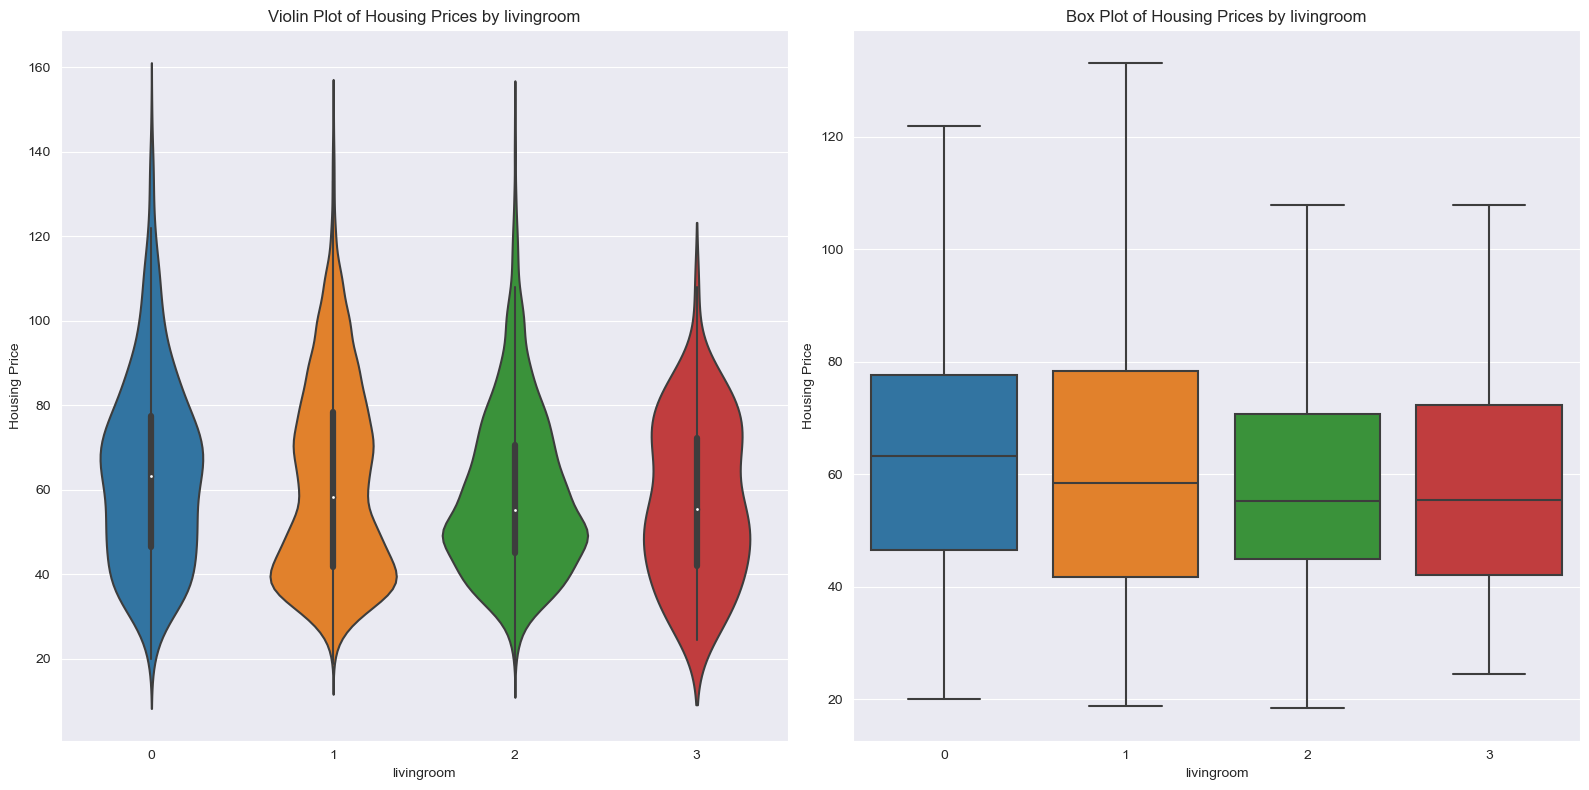

In [65]:
# Secondly, observe the relationship between internal factors of the house (floor level, number of bedrooms, number of rooms) and housing prices.

inter_factors = ['floor', 'bedroom', 'livingroom']

# Generate plots for internal factor
for col in inter_factors:
    relation_plot(col)

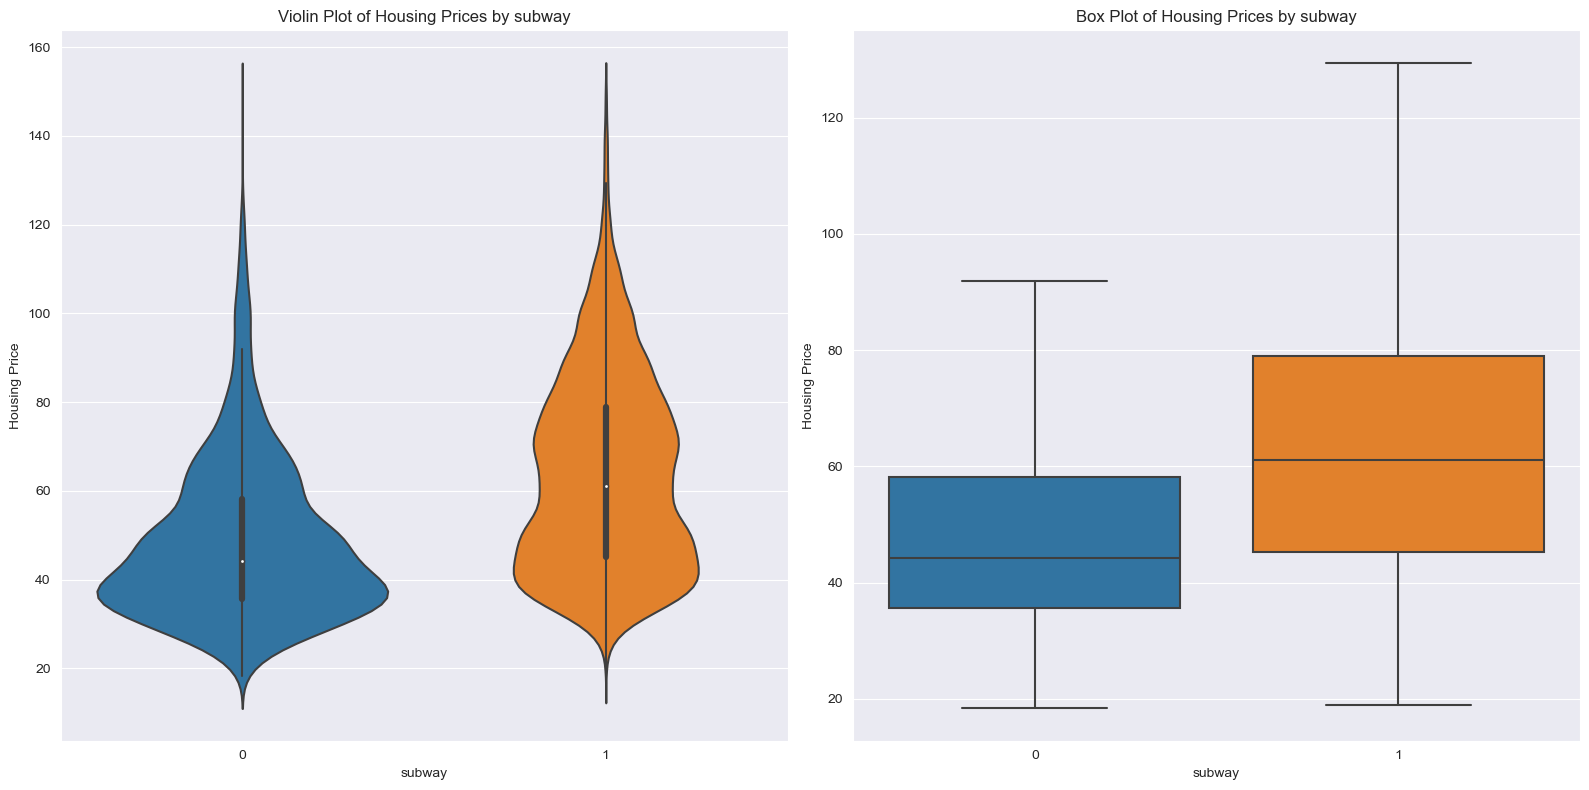

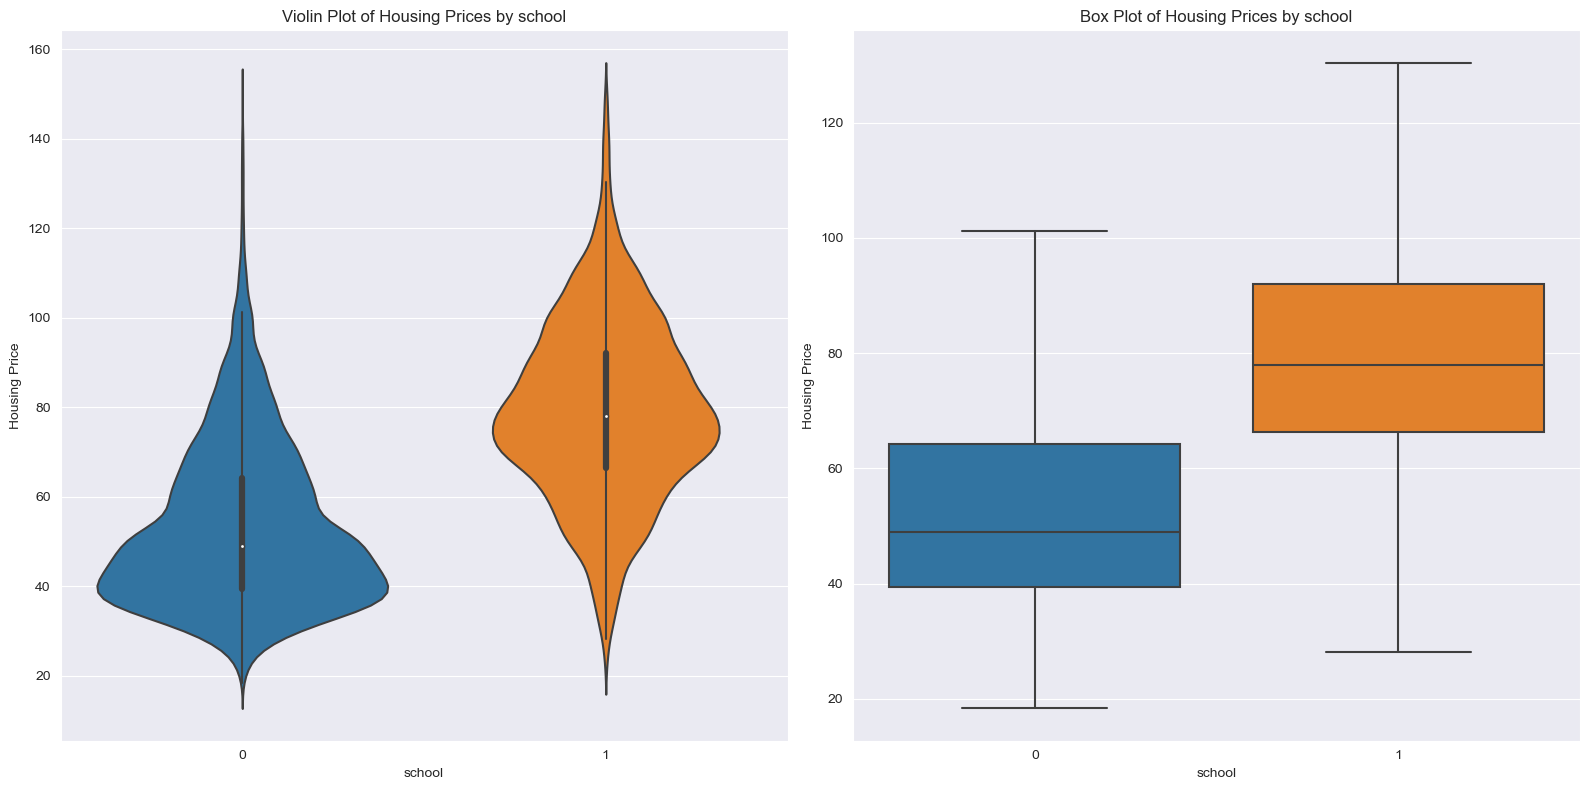

In [66]:
# Lastly, Oberserve the relationship between external factor(e.g. Subway, School) and price
external_factor = ['subway', 'school']

# plot
for col in external_factor:
    relation_plot(col)

### Continuous Variable

Pearson correlation coefficient: -0.07395474555491166
P-value: 4.180109773629401e-21


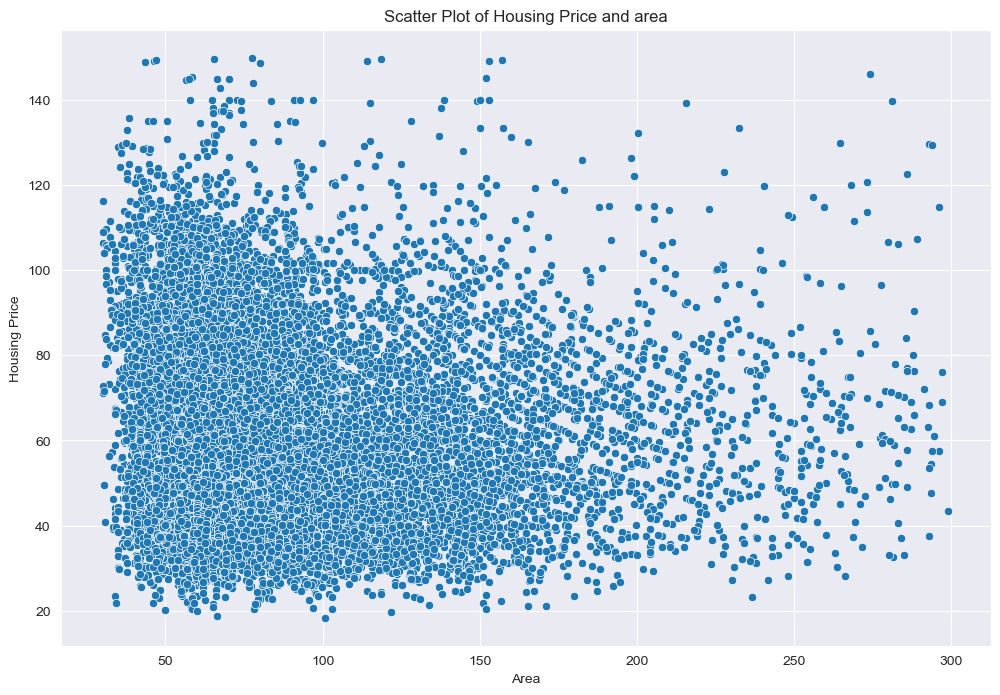

In [72]:
# There is only one continuous variable(house area), so I build a scatter plot to observe the relationship between area and price

from scipy.stats import pearsonr
# Extract the price and area columns as arrays
data1 = house_df['price'].values
data2 = house_df['area'].values

# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(data1, data2)

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=house_df, x='area', y='price')
plt.title('Scatter Plot of Housing Price and area')
plt.xlabel('Area')
plt.ylabel('Housing Price')
plt.savefig('./output_figure/Scatter_Plot_Housing_Price_and_area.png')
plt.show()

The data shows a significant right skew. To better analyze the data, I took the logarithm of X and Y respectively.

Pearson correlation coefficient: -0.09392959958625909
P-value: 4.2813171697479e-33


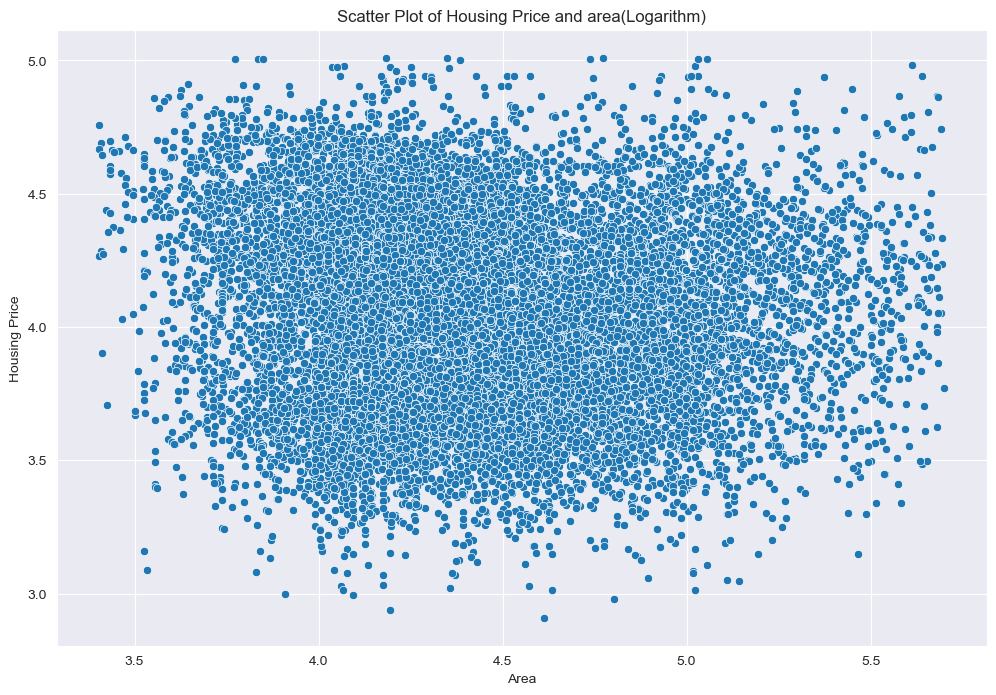

In [73]:
# Take the logarithm
house_df['area_ln'] = np.log(house_df['area'])
house_df['price_ln'] = np.log(house_df['price'])

# Extract the price and area columns as arrays
data1 = house_df['area_ln'].values
data2 = house_df['price_ln'].values

# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(data1, data2)

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# plot 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=house_df, x='area_ln', y='price_ln')
plt.title('Scatter Plot of Housing Price and area(Logarithm)')
plt.xlabel('Area')
plt.ylabel('Housing Price')
plt.savefig('./output_figure/Scatter_Plot_Housing_Price_and_area.png')
plt.show()

## Data Modeling

### Hypothesis Testing

**hypothesis testing** is a statistical method used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population. It involves formulating a null hypothesis (typically stating that there is no effect or no difference) and an alternative hypothesis (indicating the presence of an effect or difference). The analysis then evaluates the likelihood that the observed data could have occurred under the null hypothesis.

1. **Null Hypothesis**: This is the default assumption that there is no effect, no difference, or no relationship between variables. 

2. **Alternative Hypothesis**: This is the hypothesis that you want to test for. It is the opposite of the null hypothesis, suggesting that there is an effect, a difference, or a relationship. 

3. **P-value**: The p-value is the probability of observing the data. A small p-value (typically ≤ 0.05) suggests that the observed data is unlikely under the null hypothesis, leading to its rejection in favor of the alternative hypothesis.

### Sampling

Since the original sample size was too large to use the p-value-based model building scheme, stratified sampling was performed by district，then hypothesis testing.

In [75]:
# Define a sampleing function
import math
import random

# Define a sampling function
def get_sample(df, k=1, stratified_col=None, sample_by_n=True):
    """
    Sample from a DataFrame with optional stratification.

    Parameters:
    df (pd.DataFrame): The DataFrame to sample from.
    k (int or float): The sample size or fraction. If sample_by_n is True, this is the exact number of samples per group.
                      If sample_by_n is False, this is the fraction of each group to sample.
    stratified_col (list or None): A list of column names to stratify by. If None, simple random sampling is performed.
    sample_by_n (bool): If True, 'k' is treated as the exact number of samples per group. 
                        If False, 'k' is treated as a fraction of the group's size.

    Returns:
    pd.DataFrame: A DataFrame containing the sampled rows.
    """
    # If stratification is not required, perform simple random sampling
    if stratified_col is None:
        return df.sample(n=k) if sample_by_n else df.sample(frac=k)

    # Group by the specified stratified columns and count occurrences
    grouped = df.groupby(by=stratified_col).size()

    # Determine the number of samples to draw from each group
    if sample_by_n:
        group_k = grouped.map(lambda x: k)
    else:
        group_k = grouped.map(lambda x: math.ceil(x * k))

    # Initialize an empty DataFrame to hold the results
    res_df = pd.DataFrame(columns=df.columns)

    # Perform stratified sampling
    for df_idx in group_k.index:
        df1 = df
        if len(stratified_col) == 1:
            df1 = df1[df1[stratified_col[0]] == df_idx]
        else:
            for i in range(len(df_idx)):
                df1 = df1[df1[stratified_col[i]] == df_idx[i]]

        # Sample the determined number of rows from the group
        if len(df1) > 0:
            idx = random.sample(range(len(df1)), min(group_k[df_idx], len(df1)))
            group_df = df1.iloc[idx, :].copy()
            res_df = pd.concat([res_df, group_df], ignore_index=True)

    return res_df

In [85]:
# Define a function to perform ANOVA
def calculate_p_value(df, categorical_col, ):
    """
    Calculate the p-value from an ANOVA test for a given categorical variable.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    dependent_var (str): The name of the dependent variable (e.g., 'price').
    categorical_var (str): The name of the categorical variable (e.g., 'dist').
    
    Returns:
    float: The p-value from the ANOVA test.
    """
    # Fit the ANOVA model
    anova_model = ols(f'price ~ C({categorical_col})', data=df).fit()

    # Perform the ANOVA and get the p-value
    anova_table = sm.stats.anova_lm(anova_model, typ=2)
    p_value = anova_table["PR(>F)"][0]

    return p_value

In [90]:
# Sampling
data01 = get_sample(house_df, k=500, stratified_col=['dist'], sample_by_n=True)
data01

,dist,bedroom,livingroom,area,floor,subway,school,price,area_ln,price_ln
0,chaoyang,2,1,108.55,low,1,0,52.511,4.687211,3.961023
1,chaoyang,2,1,57.00,high,1,0,40.351,4.043051,3.697616
2,chaoyang,2,1,62.00,low,1,0,38.710,4.127134,3.656098
3,chaoyang,1,0,50.00,middle,1,1,61.600,3.912023,4.120662
4,chaoyang,1,1,48.07,low,0,0,42.647,3.872658,3.752957
...,...,...,...,...,...,...,...,...,...,...
2995,xicheng,3,1,116.70,low,1,0,100.258,4.759607,4.607747
2996,xicheng,3,2,119.99,middle,1,0,76.674,4.787408,4.339563
2997,xicheng,2,1,59.50,middle,1,1,98.320,4.085976,4.588227
2998,xicheng,2,1,54.03,low,1,0,80.511,3.989539,4.388394


In [91]:
# List of categorical columns to test
categorical_cols = ['dist', 'bedroom', 'livingroom', 'floor', 'subway', 'school']

# Dictionary to store the p-values
p_values = {}

# Loop through each categorical column and calculate the p-value
for col in categorical_cols:
    p_value = calculate_p_value(data01, col)
    p_values[col] = p_value
    print(f"Column: {col}, P-value: {p_value}")

Column: dist, P-value: 0.0
Column: bedroom, P-value: 0.258192456137818
Column: livingroom, P-value: 0.676554247189324
Column: floor, P-value: 0.0334459625416678
Column: subway, P-value: 1.0037003776626662e-50
Column: school, P-value: 2.8701666123201546e-221


### Observations

Based on several times sampling and calculations,  we could find that:

- Strongly Significant Factors: dist, subway, and school have very small p-values, indicating that they are highly significant in determining housing prices. These variables should be key considerations in any housing price model or analysis.

- Moderately Significant Factor: floor has a p-value just under 0.05, suggesting that it has a statistically significant but potentially less impactful role compared to dist, subway, and school.

- Not Significant Factors: bedroom and livingroom have p-values well above 0.05, indicating that these factors do not significantly influence housing prices in this dataset.


In [92]:
# The living room is not very significant, consider factorizing it into a binary variable.
data01['livingroom_new'] = (
    data01['livingroom']
    .apply(lambda x:1 if x > 0 else 0)  # This lambda function checks if the value in the livingroom column is greater than 0. If true, it assigns 1; otherwise, it assigns 0.
)
data01.head()

,dist,bedroom,livingroom,area,floor,subway,school,price,area_ln,price_ln,livingroom_new
0,chaoyang,2,1,108.55,low,1,0,52.511,4.687211,3.961023,1
1,chaoyang,2,1,57.00,high,1,0,40.351,4.043051,3.697616,1
2,chaoyang,2,1,62.00,low,1,0,38.710,4.127134,3.656098,1
3,chaoyang,1,0,50.00,middle,1,1,61.600,3.912023,4.120662,0
4,chaoyang,1,1,48.07,low,0,0,42.647,3.872658,3.752957,1


In [94]:
# For multiple categorical variables, generate dummy variables
data02 = pd.get_dummies(data01[['dist', 'floor']])

# Delete reference group: 'shijingshan', 'floor_high'
data02.drop(['dist_shijingshan', 'floor_high'], axis=1, inplace=True)

# check
data02.head()

,dist_chaoyang,dist_dongcheng,dist_fengtai,dist_haidian,dist_xicheng,floor_low,floor_middle
0,True,False,False,False,False,True,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,True,False
3,True,False,False,False,False,False,True
4,True,False,False,False,False,True,False


In [96]:
# The resulting dummy variables are merged with other required variables into a new data frame
data03 = pd.concat([data01[['bedroom', 'area', 'subway', 'school',
                            'price', 'livingroom_new']],
                    data02],
                   axis=1)
data03

,bedroom,area,subway,school,price,livingroom_new,dist_chaoyang,dist_dongcheng,dist_fengtai,dist_haidian,dist_xicheng,floor_low,floor_middle
0,2,108.55,1,0,52.511,1,True,False,False,False,False,True,False
1,2,57.00,1,0,40.351,1,True,False,False,False,False,False,False
2,2,62.00,1,0,38.710,1,True,False,False,False,False,True,False
3,1,50.00,1,1,61.600,0,True,False,False,False,False,False,True
4,1,48.07,0,0,42.647,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3,116.70,1,0,100.258,1,False,False,False,False,True,True,False
2996,3,119.99,1,0,76.674,1,False,False,False,False,True,False,True
2997,2,59.50,1,1,98.320,1,False,False,False,False,True,False,True
2998,2,54.03,1,0,80.511,1,False,False,False,False,True,True,False


In [97]:
data03.columns

Index(['bedroom', 'area', 'subway', 'school', 'price', 'livingroom_new',
       'dist_chaoyang', 'dist_dongcheng', 'dist_fengtai', 'dist_haidian',
       'dist_xicheng', 'floor_low', 'floor_middle'],
      dtype='object')

## Linear Regression Model

In [103]:
# Linear Regression Prediction
# Based on significant factor's analysis results, I choose strong significant factors(dist, subway, subway) and moderately factor(floor) to predict the results.
# I add floor binary variables and districs dummy variables into prediction model, a nd conduct the results.

lm1 = ols("price ~ dist_chaoyang+dist_dongcheng+dist_fengtai+dist_haidian+dist_xicheng+school+subway+floor_middle+floor_low+area", data=data03).fit()
lm1_summary = lm1.summary()
lm1_summary  #desplay the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     437.3
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:57:50   Log-Likelihood:                -12255.
No. Observations:                3000   AIC:                         2.453e+04
Df Residuals:                    2989   BIC:                         2.460e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 35.0700      0.982     35.696      0.000      33.144      36.996
dist_chaoyang[T.True]      8.7409      0.951      9.191      0.000       6.876      10.606
dist_dongcheng[T.True]    22.5943      0.988     22.869      0.000      20.657      24.532
dist_fengtai[T.True]       0.7297      0.923      0.791      0.429      -1.079       2.539
dist_haidian[T.True]      21.5197      0.971     22.172      0.000      19.617      23.423
dist_xicheng[T.True]      38.0317      1.004     37.867      0.000      36.062      40.001
school[T.1]               11.3361      0.669     16.947      0.000      10.025      12.648
subway[T.1]                6.8203      0.696      9.795      0.000       5.455       8.186
floor_middle[T.True]       1.6944      0.630      2.688      0.007       0.458       2.930
floor_low[T.True]          1.1131      0.650      1.712      0.087      -0.162       2.388
area                       0.0016      0.006      0.265      0.791      -0.010       0.014
==============================================================================
Omnibus:                      233.807   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.649
Skew:                           0.559   Prob(JB):                     5.53e-91
Kurtosis:                       4.440   Cond. No.                         687.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='pred1', ylabel='resid1'>

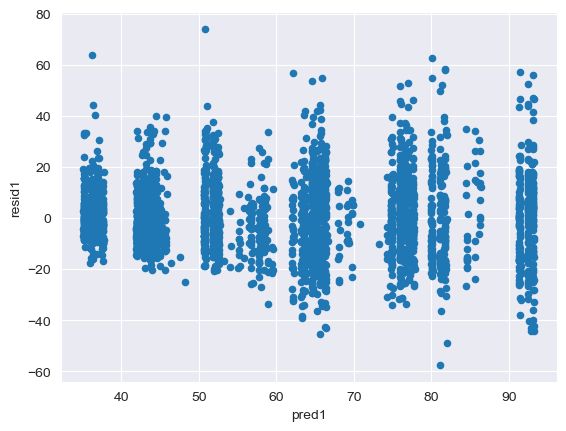

In [104]:
# Model evaluation： residual plot
data03['pred1']=lm1.predict(data03)
data03['resid1']=lm1.resid
data03.plot('pred1','resid1',kind='scatter')

### Observation and Analysis

Ideally, the residuals should be randomly scattered around the horizontal axis (the `x-axis`, representing the predicted values `pred1`). By observation, we can see that the residual plot shows some clustering phenomena, indicating that the model may struggle to fully capture the relationship between the independent variables and the dependent variable (`price`). This suggests a need for additional variables, interaction terms, or nonlinear models.

### log linear model

In [105]:
data04 = data03.copy()

In [107]:
# Take the logarithm of the price
data04['price_ln'] = np.log(data04['price']) 
# Take the logarithm of the area
data04['area_ln'] = np.log(data04['area'])

# Review
data04.head()

,bedroom,area,subway,school,price,livingroom_new,dist_chaoyang,dist_dongcheng,dist_fengtai,dist_haidian,dist_xicheng,floor_low,floor_middle,pred1,resid1,price_ln,area_ln
0,2,108.55,1,0,52.511,1,True,False,False,False,False,True,False,51.920550,0.590450,3.961023,4.687211
1,2,57.00,1,0,40.351,1,True,False,False,False,False,False,False,50.723747,-10.372747,3.697616,4.043051
2,2,62.00,1,0,38.710,1,True,False,False,False,False,True,False,51.844941,-13.134941,3.656098,4.127134
3,1,50.00,1,1,61.600,0,True,False,False,False,False,False,True,63.742837,-2.142837,4.120662,3.912023
4,1,48.07,0,0,42.647,1,True,False,False,False,False,True,False,45.001978,-2.354978,3.752957,3.872658


In [109]:
# Predict the results based on log column
lm2 = ols("price_ln ~ dist_chaoyang+dist_dongcheng+dist_fengtai+dist_haidian+dist_xicheng+school+subway+floor_middle+floor_low+area_ln", data=data04).fit()
lm2_summary = lm2.summary()
lm2_summary  #Display the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     459.8
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:26:00   Log-Likelihood:                 107.54
No. Observations:                3000   AIC:                            -193.1
Df Residuals:                    2989   BIC:                            -127.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.5491      0.047     75.213      0.000       3.457       3.642
dist_chaoyang[T.True]      0.2021      0.015     13.085      0.000       0.172       0.232
dist_dongcheng[T.True]     0.4299      0.016     26.849      0.000       0.399       0.461
dist_fengtai[T.True]       0.0359      0.015      2.395      0.017       0.007       0.065
dist_haidian[T.True]       0.4251      0.016     26.986      0.000       0.394       0.456
dist_xicheng[T.True]       0.6367      0.016     39.070      0.000       0.605       0.669
school[T.1]                0.1667      0.011     15.352      0.000       0.145       0.188
subway[T.1]                0.1311      0.011     11.601      0.000       0.109       0.153
floor_middle[T.True]       0.0246      0.010      2.403      0.016       0.005       0.045
floor_low[T.True]          0.0177      0.011      1.678      0.093      -0.003       0.038
area_ln                    0.0053      0.010      0.509      0.611      -0.015       0.026
==============================================================================
Omnibus:                       60.421   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.601
Skew:                          -0.115   Prob(JB):                     1.30e-25
Kurtosis:                       3.930   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='pred1', ylabel='resid1'>

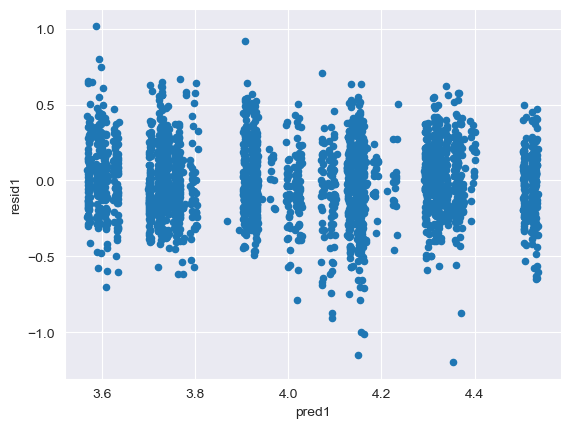

In [110]:
# Model evaluation： residual plot
data04['pred1']=lm2.predict(data04)
data04['resid1']=lm2.resid
data04.plot('pred1','resid1',kind='scatter')

### Observation and Analysis

The diffusion of residuals does not show a clear pattern with the changes in `pred1`, indicating that heteroscedasticity is not a significant issue in this model, and the variance of the residuals remains relatively constant across different levels of predicted values.

This suggests that the model performs reasonably well in capturing the relationship between independent and dependent variables. The absence of obvious patterns in the residuals indicates that there are no serious issues with the model, such as heteroscedasticity or nonlinear relationships.

### Log-linear model with interaction terms

There are 3 strong significant factors(dist, subway, subway). For now, 

In [119]:
# Define a function to calculate and print the price difference between non-school and school district houses
def print_price_comparison(dist_name, df, dist_column_name=None):
    if dist_column_name:
        non_school_price = df[(df[dist_column_name]==1) & (df['school']==0)]['price'].mean()
        school_price = df[(df[dist_column_name]==1) & (df['school']==1)]['price'].mean()
    else:
        non_school_price = df[(df['dist']==dist_name) & (df['school']==0)]['price'].mean()
        school_price = df[(df['dist']==dist_name) & (df['school']==1)]['price'].mean()

    print(f"{dist_name} non-school\t{round(non_school_price, 2)}K\t school \t{round(school_price, 2)}K")


In [125]:
# Print price comparison for Shijingshan district
print('Shijingshan non-school\t', round(data01[(data01['dist']=='shijingshan') & (house_df['school']==0)]['price'].mean(), 2), 'K\t',
      'school\t', round(data01[(house_df['dist']=='shijingshan') & (data01['school']==1)]['price'].mean(), 2), 'K')


Shijingshan non-school	 39.93 K	 school	 77.52 K


In [127]:
# List of districts to compare
schools = ['fengtai', 'chaoyang', 'dongcheng', 'haidian', 'xicheng']

# Iterate over the list of districts and print the price comparison
for school in schools:
    print_price_comparison(school, data04, dist_column_name=f'dist_{school}')

fengtai non-school	42.19K	 school 	47.45K
chaoyang non-school	52.19K	 school 	56.53K
dongcheng non-school	64.76K	 school 	76.93K
haidian non-school	60.39K	 school 	77.34K
xicheng non-school	79.7K	 school 	92.01K


In [124]:
data01.columns

Index(['dist', 'bedroom', 'livingroom', 'area', 'floor', 'subway', 'school',
       'price', 'area_ln', 'price_ln', 'livingroom_new'],
      dtype='object')

array(['chaoyang', 'dongcheng', 'fengtai', 'haidian', 'shijingshan',
       'xicheng'], dtype=object)

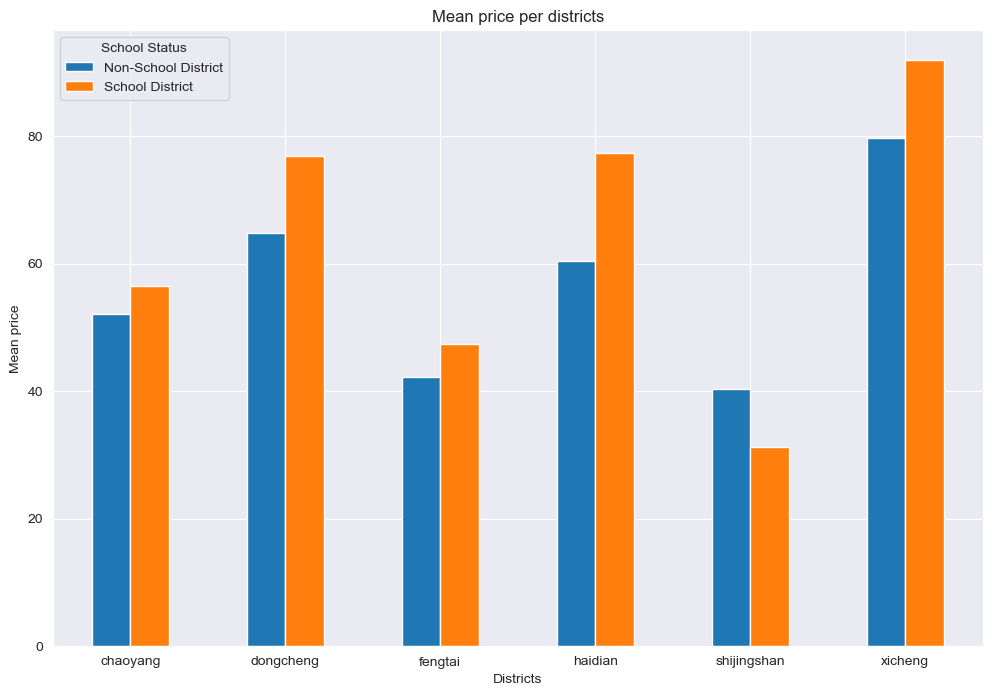

In [131]:
# calculate the mean prices
grouped_mean_df = (
    data01.groupby(['dist', 'school'])['price']
    .mean()
    .unstack()
)

# Plot stacked bar chart
grouped_mean_df.plot(kind='bar', stacked=False, figsize=(12,8))
plt.xticks(rotation=0)
plt.title("Mean price per districts")
plt.xlabel('Districts')
plt.ylabel('Mean price')
plt.legend(title='School Status', labels=['Non-School District', 'School District'])
plt.savefig('./output_figure/Mean price per districts.png')
plt.show()

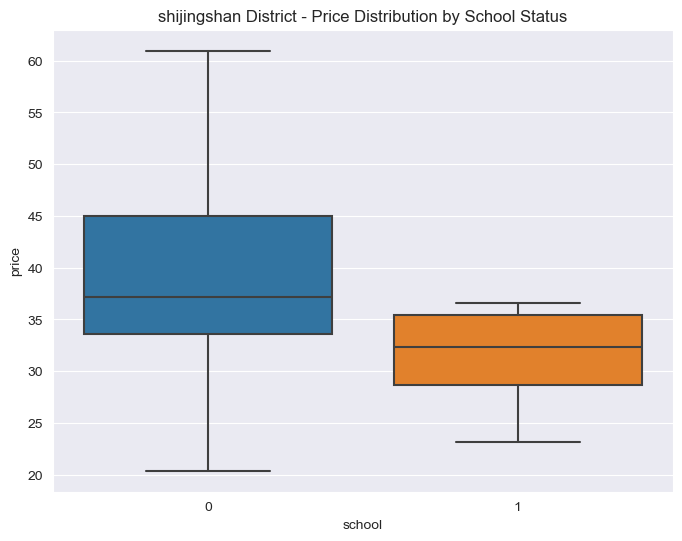

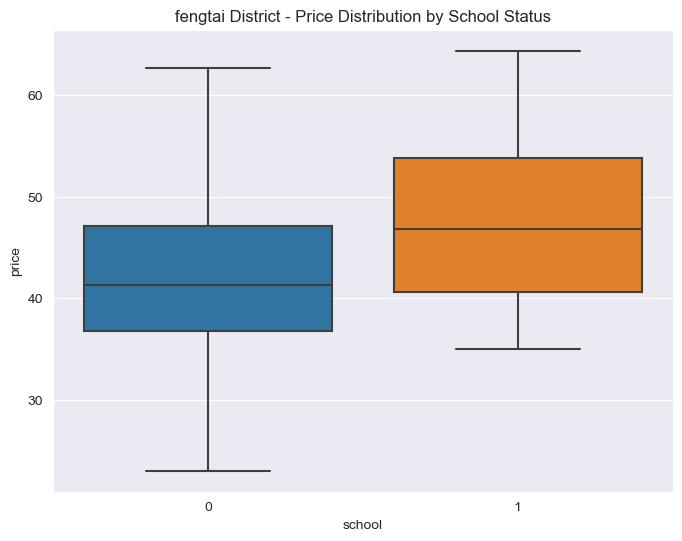

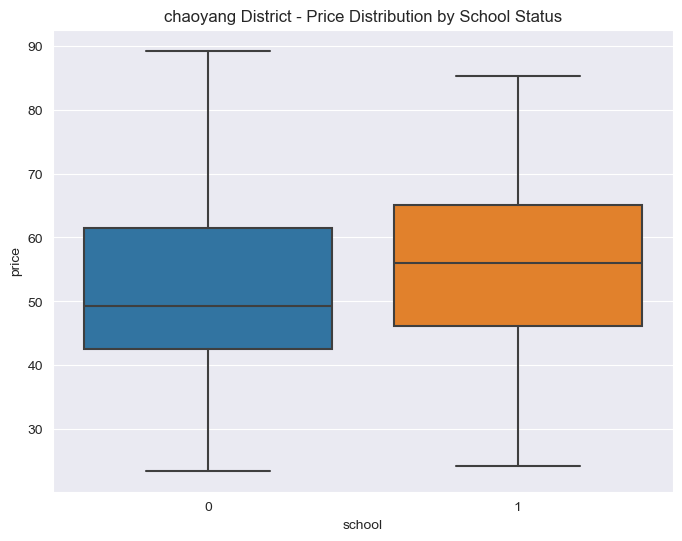

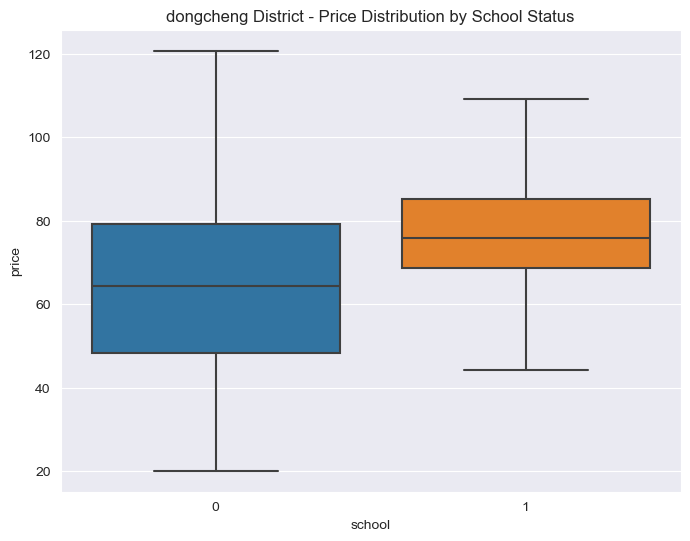

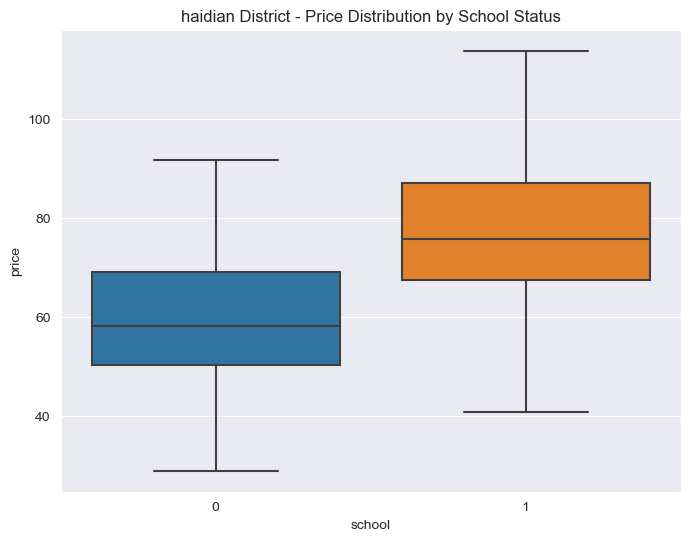

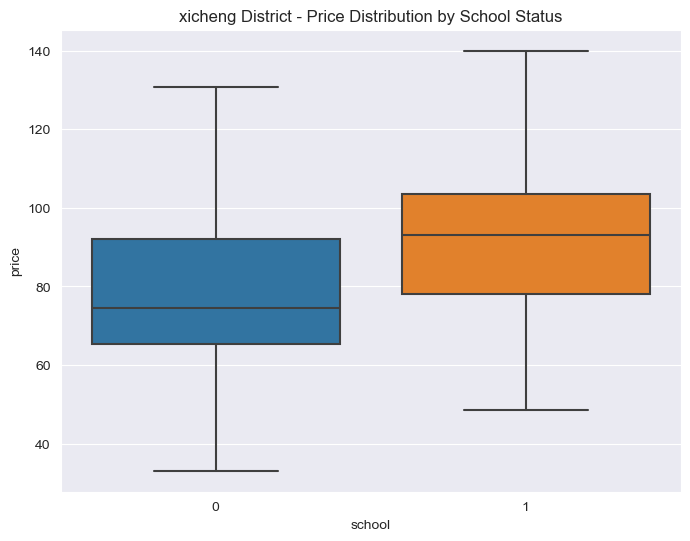

In [133]:
# Build box plot chart
dists = ['shijingshan', 'fengtai', 'chaoyang', 'dongcheng', 'haidian', 'xicheng']

for dist in dists:
    # Filter the data for the current district
    df_filtered = data01[data01['dist'] == dist]

    # Create the box plot with Seaborn
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='school', y='price', data=df_filtered, showfliers=False)

    # Set and labels
    plt.title(f'{dist} District - Price Distribution by School Status')
    
    # Save fig
    plt.savefig('./output_figure/Box plot {dist} Price Distribution by School Status.png')
    
    # Display the plot
    plt.show()

In [142]:
# Log-linear model with interaction terms, considering the interaction between urban areas and school districts
data05 = data04.copy()

lm3 = ols("price_ln ~ (dist_chaoyang+dist_dongcheng+dist_fengtai+dist_haidian+dist_xicheng)*school+subway+floor_middle+floor_low+area_ln", data=data05).fit()

lm3_summary = lm3.summary()

# Display the results
lm3_summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     312.6
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:27:02   Log-Likelihood:                 126.89
No. Observations:                3000   AIC:                            -221.8
Df Residuals:                    2984   BIC:                            -125.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              3.5519      0.047     75.508      0.000       3.460       3.644
dist_chaoyang[T.True]                  0.2176      0.016     13.524      0.000       0.186       0.249
dist_dongcheng[T.True]                 0.4137      0.018     22.953      0.000       0.378       0.449
dist_fengtai[T.True]                   0.0347      0.015      2.307      0.021       0.005       0.064
dist_haidian[T.True]                   0.3931      0.018     22.245      0.000       0.358       0.428
dist_xicheng[T.True]                   0.6391      0.020     32.727      0.000       0.601       0.677
school[T.1]                           -0.2122      0.105     -2.028      0.043      -0.417      -0.007
subway[T.1]                            0.1271      0.011     11.259      0.000       0.105       0.149
floor_middle[T.True]                   0.0255      0.010      2.501      0.012       0.005       0.045
floor_low[T.True]                      0.0184      0.011      1.752      0.080      -0.002       0.039
dist_chaoyang[T.True]:school[T.1]      0.2851      0.108      2.644      0.008       0.074       0.497
dist_dongcheng[T.True]:school[T.1]     0.4083      0.107      3.827      0.000       0.199       0.617
dist_fengtai[T.True]:school[T.1]       0.2994      0.124      2.424      0.015       0.057       0.542
dist_haidian[T.True]:school[T.1]       0.4423      0.107      4.144      0.000       0.233       0.652
dist_xicheng[T.True]:school[T.1]       0.3703      0.107      3.470      0.001       0.161       0.579
area_ln                                0.0060      0.010      0.579      0.563      -0.014       0.026
==============================================================================
Omnibus:                       50.270   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.273
Skew:                          -0.083   Prob(JB):                     9.19e-21
Kurtosis:                       3.843   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='pred1', ylabel='resid1'>

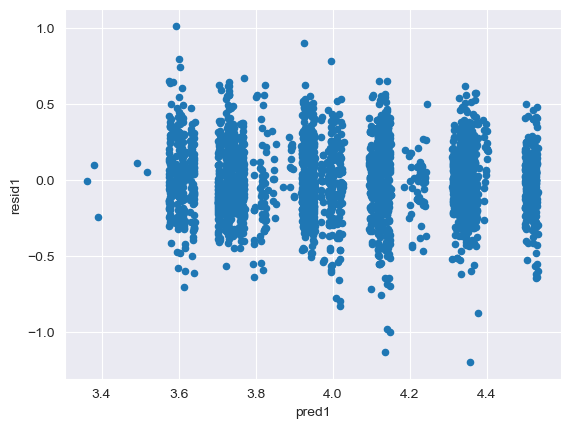

In [143]:
# Model evaluation： residual plot
data05['pred1']=lm3.predict(data04)
data05['resid1']=lm3.resid
data05.plot('pred1','resid1',kind='scatter')

In [ ]:
## Step 4: Housing Price

Suppose there is a family of three, and the parents wish for their child to attend school in Dongcheng District, planning to purchase a 70-square-meter two-bedroom apartment near the subway at a mid-level floor; how much would it approximately cost?

In [135]:
# define x_new
x_new = data04.head(1)
x_new['dist_chaoyang'] = 0
x_new['dist_dongcheng'] = 1
x_new['bedroom'] = 2
x_new['livingroom'] = 1
x_new['area_ln'] = np.log(70)
x_new['subway'] = 1
x_new['school'] = 1
x_new['livingroom_new'] = 1

# Review
x_new

,bedroom,area,subway,school,price,livingroom_new,dist_chaoyang,dist_dongcheng,dist_fengtai,dist_haidian,dist_xicheng,floor_low,floor_middle,pred1,resid1,price_ln,area_ln,livingroom
0,2,108.55,1,1,52.511,1,0,1,False,False,False,True,False,3.924844,0.036179,3.961023,4.248495,1


In [140]:
# Prediction
# Predict number is log number, therefore I need to convert this into oariginal price by math.exp
predict_price = round(math.exp(lm3.predict(x_new)),2) 
total_price = predict_price * 70 / 1000

print(f"House Price: {round(predict_price, 2)} K/m²， Total House Price: {round(total_price, 2)} M")

House Price: 76.14 K/m²， Total House Price: 5.33 M
